In [2]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

<h2>Sympy</h2>
<hr><p>Sybols can defined as follows:</p>

In [3]:
x = smp.symbols('x')

In [4]:
x**2

x**2

In [5]:
y = smp.sin(x)
y-x**2

-x**2 + sin(x)

<p>There are many many function bulit into sympy</p>

smp.<p>press tap</p>

<p>can save experssion in new variable</p>

In [6]:
y = x**2 +4*x +3
y

x**2 + 4*x + 3

<p>Do operations on the new variable</p>

In [7]:
z = y**2
z

(x**2 + 4*x + 3)**2

<p>Note that is doesn't expand.There are different methods you need to call to do different with the expression</p>

In [8]:
z.factor()

(x + 1)**2*(x + 3)**2

In [9]:
z.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

<p>In the notation $smp.solve(f,x)$ sympy finds the value of </p>$x $ that makes $f(x)=0$

In [10]:
smp.solve(z,x)

[-3, -1]

In [11]:
smp.solve(smp.sin(x),x)


[0, pi]

<p><b>Good Pratice:</b> If you know that your variable $x$ is real (and is some cses non-negative) it's good to specify this when you define your varaiables to prevent complicated issues when solving complicated problems (expecially with integrals)</p>

In [12]:
x = smp.symbols('x')
smp.solve(x**2+1,x)

[-I, I]

In [104]:
x = smp.symbols('x',real=True,, positive=True)
smp.solve(x+4,x)

SyntaxError: invalid syntax (331663535.py, line 1)

<p>Can define many variables at once</p>

In [18]:
x,y,z = smp.symbols('x y z')
F = x**2 + smp.sin(z)*y
F

x**2 + y*sin(z)

<p>Can solve multivariable expressions, specifying which variable we want to solve for . In each case $ F=0$ is being solved for</p>

In [19]:
x_sol = smp.solve(F,x)
x_sol

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [20]:
y_sol = smp.solve(F,y)
y_sol

[-x**2/sin(z)]

In [21]:
z_sol = smp.solve(F,z)
z_sol

[asin(x**2/y) + pi, -asin(x**2/y)]

<p>Finally, it may be the case that one has a sympy experssion but wants to convert it into a numerical function so they can plot on computer</p>

In [22]:
expr = z_sol[0]
expr

asin(x**2/y) + pi

In [23]:
expr_f = smp.lambdify([x,y],expr)
expr_f(1,2)

3.6651914291880923

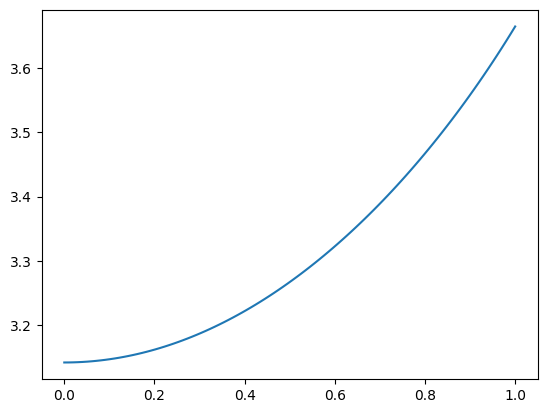

In [24]:
x_num = np.linspace(0,1,100)
y_num =2
plt.plot(x_num,expr_f(x_num,y_num))

<p>for multivariable expressions, can also substiute values in</p>

In [25]:
F 

x**2 + y*sin(z)

In [26]:
F.subs([(y,3),(z,smp.pi/z)])

x**2 + 3*sin(pi/z)

<h2>Examples</h2><hr><p>A falling object encounters a moving platform acclearting upward</p><br><p>1. Objects $h_0(t) = h_0 - v_0*t -1/2 *gt^2$</p>
<p>2. Platform $h_p(t) = v_p + 1/2 * qt^2$</p>
<b>Find the initial velocity $v_0$ such that when the object and platform collide, they are moving at the same speed</b>
<p>We need to solve for $v_0$ and $t$ in the two equation</p>
<p>$$1.h_0(t) = h_p(t)$$</p>
$$2. \frac{dh_0(t)}{dt} = -\frac{dh_p(t)}{dt} $$
<p> In sympy , need to contruct our system of equation as $EQ_1 = 0 $ and $EQ_2 =0$ .. in our case ,we rewrite them as </p>
$$2. h_0(t) - h_p(t)=0$$
$$2.\frac{dh_0(t)}{dt} + \frac{dh_p(t)}{dt}=0$$


In [27]:
h0 , v0 , t ,g,q,vp = smp.symbols('h_0 v_0 t g q v_p', real=True, positive=True)
h0 , v0 ,t ,g ,q

(h_0, v_0, t, g, q)

<p>Defining experssion</p>

In [28]:
h0t = h0 -v0*t - smp.Rational(1,2)*g*t**2
dh0t = -g*t - v0
hpt = vp*t + smp.Rational(1,2)*q*t**2
dhpt = vp + q*t
dhpt

EQ1 = h0t - hpt
EQ2 = dh0t + dhpt


<p>solving equation</p>

In [29]:
t_collide , v_ifall = smp.solve([EQ1,EQ2],[t,v0])[0]# giving only one eqn since qudratic eqn have 3 root
v_ifall


v_p*(g + q)/(-g + 3*q) - sqrt(2)*(-g + q)*sqrt(-g*h_0 + 3*h_0*q + 2*v_p**2)/(-g + 3*q)

<h5>What is the veloctiy when they collide?</h5>

In [30]:
dh0t.subs([(t,t_collide),(v0,v_ifall)]).simplify()


(g*v_p - q*v_p + q*sqrt(-2*g*h_0 + 6*h_0*q + 4*v_p**2))/(-g + 3*q)

In [31]:
dhpt.subs([(t,t_collide),(v0,v_ifall)]).simplify()

(-g*v_p + q*v_p - q*sqrt(-2*g*h_0 + 6*h_0*q + 4*v_p**2))/(-g + 3*q)

<h2>Solve using sympy</h2>$$9x+8y=7$$ $$3x^2 +2y^2=7$$

In [32]:
x,y = smp.symbols('x y')
eqn = 3*x**2+2*y**2-7
y_vals = (7-9*x)/8
Eq = eqn.subs(y,y_vals).simplify()
x_vals = smp.solve(Eq,x)
smp.solve(Eq,x)
Eq

177*x**2/32 - 63*x/16 - 175/32

<h2>Basic Antiderivaties</h2>

$$\int\csc(x)\cot(x) dx$$

In [33]:
smp.integrate(smp.csc(x)*smp.cot(x),x)

-1/sin(x)

$$\int 4\sec(3x)\tan(3x)dx$$

In [35]:
smp.integrate(4*smp.sec(3*x)*smp.tan(3*x),x)

4/(3*cos(3*x))

$$ \int \left(\frac{2}{\sqrt{1-x^2}} - \frac{1}{x^\frac{1}{4}} \right)dx$$

In [38]:
smp.integrate((2/smp.sqrt(1-x**2))-1/x**smp.Rational(1,4))

-4*x**(3/4)/3 + 2*asin(x)

<h2>Intial Value Problems</h2>

1.Given $\frac{dy}{dx} = 8x+\csc(x)^2 $ with $y(\frac{\pi}{2}) = -7$ solve for $y(x)$

In [42]:
integral = smp.integrate(8*x+smp.csc(x)**2,x)
integral

4*x**2 - cos(x)/sin(x)

In [47]:
c = -integral.subs(x,smp.pi/2) -7
c

-pi**2 - 7

In [51]:
y = integral+c

<h2>More Complicated Expression</h2>

$$ \int \frac{(1+\sqrt{x})^\frac{1}{3}}{\sqrt{x}}dx $$

In [53]:
smp.integrate((1+smp.sqrt(x))**smp.Rational(1,3)/smp.sqrt(x),x)

3*sqrt(x)*(sqrt(x) + 1)**(1/3)/2 + 3*(sqrt(x) + 1)**(1/3)/2

$$\int x(1-x^2)^\frac{1}{4} dx$$

In [56]:
smp.integrate(x*(1-x**2)**smp.Rational(1,4))

2*x**2*(1 - x**2)**(1/4)/5 - 2*(1 - x**2)**(1/4)/5

$$ \int \frac{(2x-1)\cos(\sqrt{3(2x-1)^2+6}}{\sqrt{3(2x-1)^2+6}}dx$$

In [66]:
smp.integrate((2*x-1)*smp.cos(smp.sqrt(3*(2*x-1)**2+6))/smp.sqrt(3*(2*x-1)**2+6),x)

sin(sqrt(3*(2*x - 1)**2 + 6))/6

<h2>Definite Integrals</h2>

$$\int_{0}^{\ln{4}} \frac{e^x}{\sqrt{e^{2x}+9}}dx$$

In [74]:
smp.integrate(smp.exp(x)/smp.sqrt(smp.exp((2*x))+9),(x,0,smp.log(4)))

-asinh(1/3) + asinh(4/3)

$$\int_{1}^{t} x^{10} e^x dx$$

In [78]:
smp.integrate(x**10*smp.exp(x),(x,1,t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

<h2>Improper Integrals</h2>

$$\int_{0}^{\infty}\frac{16\tan^{-1}(x)}{1+x^2}dx$$

In [82]:
smp.integrate(16*smp.atan(x)/(1+x**2),(x,0,smp.oo))

2*pi**2

<h2>Sequences and Series</h2>

In [83]:
n = smp.symbols('n')

$$ \sum_{n=0}^{\infty}\frac{6}{4^n} $$

In [87]:
smp.Sum(6/4**n,(n,0,smp.oo)).doit()

8

$$ \sum_{n=0}^{\infty} \frac{2^{n+1}}{5^n}$$

In [90]:
smp.Sum(2**(n+1)/5**n,(n,0,smp.oo)).doit()

10/3

$$ \sum_{n=1}^{\infty}\frac{\tan^{-1}(n)}{n^{1.1}}$$

In [95]:
smp.Sum(smp.atan(n)/n**smp.Rational(11,10),(n,1,smp.oo)).n()

15.3028821020457

$$ \sum_{n=1}^{\infty} \frac{1+\cos(n)}{n} $$

In [97]:
smp.Sum((1+smp.cos(n))/n,(n,1,smp.oo)).n()

0.e+2

$$ \sum_{n=1}^{\infty} \frac{1+\cos(n)}{n^2} $$

In [103]:
smp.Sum((1+smp.cos(n))/n**2,(n,1,smp.oo)).n()

1.969